<a href="https://colab.research.google.com/github/prahaladtalur/N-CMAPSS-Engine-Prediction/blob/main/N_CMAPSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uv
!uv add rul-datasets
!pip install rul-datasets
import rul_datasets
from rul_datasets.reader.ncmapss import NCmapssReader
import inspect

print(inspect.signature(NCmapssReader))
print(dir(NCmapssReader))
help(NCmapssReader)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 49.6 MB/s eta 0:00:00
error: No `pyproject.toml` found in current directory or any parent directory
(fd: int, window_size: Optional[int] = None, max_rul: Optional[int] = 65, percent_broken: Optional[float] = None, percent_fail_runs: Union[float, List[int], NoneType] = None, feature_select: Optional[List[int]] = None, truncate_val: bool = False, run_split_dist: Optional[Dict[str, List[int]]] = None, truncate_degraded_only: bool = False, resolution_seconds: int = 1, padding_value: float = 0.0, scaling_range: Tuple[int, int] = (0, 1)) -> None
['_FILE_NAMES', '_NCMAPSS_ROOT', '_NUM_ENTITIES', '_WINDOW_SIZES', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__

## Cell 2: Create src/data/load_data.py

This cell creates the data loading module with functions to download and split the N-CMAPSS dataset.

In [ ]:
!pip install -q rul-datasets torch scikit-learn numpy

import os

dirs = [
    'src/data',
    'src/models',
    'src/utils',
    'data/raw'
]
for dir_path in dirs:
    os.makedirs(dir_path, exist_ok=True)
    print(f"✓ Created {dir_path}/")

init_files = [
    'src/__init__.py',
    'src/data/__init__.py',
    'src/models/__init__.py',
    'src/utils/__init__.py'
]
for init_file in init_files:
    with open(init_file, 'w') as f:
        f.write('')
    print(f"✓ Created {init_file}")

print("\n✅ Directory structure created successfully!")


✓ Created src/data/
✓ Created src/models/
✓ Created src/utils/
✓ Created data/raw/
✓ Created src/__init__.py
✓ Created src/data/__init__.py
✓ Created src/models/__init__.py
✓ Created src/utils/__init__.py

✅ Directory structure created successfully!


In [ ]:
%%writefile src/data/load_data.py
import os
import importlib
from typing import Tuple, Optional

def _ensure_rul_data_root(path: str) -> str:
    path = os.path.abspath(path)
    os.makedirs(path, exist_ok=True)
    os.environ["RUL_DATASETS_DATA_ROOT"] = path
    try:
        rul_datasets = importlib.import_module("rul_datasets")
        if hasattr(rul_datasets, "set_data_root"):
            try:
                rul_datasets.set_data_root(path)
            except Exception:
                pass
    except Exception as exc:
        raise ImportError(
            "rul-datasets is not installed or cannot be imported. "
            "Install with `pip install rul-datasets` and try again."
        ) from exc
    return path

def download_ncmapss(data_dir: str = "data/raw", fd: int = 1, cache: bool = True):
    data_root = _ensure_rul_data_root(data_dir)
    try:
        from rul_datasets.reader.ncmapss import NCmapssReader
    except Exception as e:
        try:
            from rul_datasets.reader import ncmapss as ncmapss_mod
            NCmapssReader = ncmapss_mod.NCmapssReader
        except Exception:
            raise ImportError(
                "Could not import NCmapssReader from rul_datasets. "
                "Make sure `rul-datasets` is installed and up to date (pip install rul-datasets)."
            ) from e
    reader = NCmapssReader(fd=fd)
    reader.prepare_data(cache=cache)
    print(f"N-CMAPSS fd={fd} prepared and cached under: {data_root}")
    return reader

def get_datasets(fd: int = 1, data_dir: str = "data/raw", cache: bool = True) -> Tuple[Tuple, Optional[Tuple], Tuple]:
    reader = download_ncmapss(data_dir=data_dir, fd=fd, cache=cache)
    try:
        dev_features, dev_labels = reader.load_split("dev")
    except Exception as e:
        raise RuntimeError(f"Failed to load 'dev' split: {e}") from e
    val_pair = None
    try:
        val_features, val_labels = reader.load_split("val")
        val_pair = (val_features, val_labels)
    except Exception:
        val_pair = None
    try:
        test_features, test_labels = reader.load_split("test")
    except Exception as e:
        raise RuntimeError(f"Failed to load 'test' split: {e}") from e
    return (dev_features, dev_labels), val_pair, (test_features, test_labels)

if __name__ == "__main__":
    try:
        (dev_X, dev_y), val_pair, (test_X, test_y) = get_datasets(fd=1, data_dir="data/raw")
        print("dev units:", len(dev_X), "example shape:", dev_X[0].shape if dev_X else None)
        if val_pair is not None:
            print("val units:", len(val_pair[0]), "example shape:", val_pair[0][0].shape)
        else:
            print("no validation split found (val is None)")
        print("test units:", len(test_X), "example shape:", test_X[0].shape if test_X else None)
    except Exception as err:
        import traceback
        traceback.print_exc()
        raise

Overwriting src/data/load_data.py


In [ ]:
# Install dependencies
!pip install -q rul-datasets matplotlib torch scikit-learn numpy

import os

# Create directories
dirs = [
    'src/data',
    'src/models',
    'src/utils',
    'data/raw'
]
for dir_path in dirs:
    os.makedirs(dir_path, exist_ok=True)
    print(f"✓ Created {dir_path}/")

# Create __init__.py files
init_files = [
    'src/__init__.py',
    'src/data/__init__.py',
    'src/models/__init__.py',
    'src/utils/__init__.py'
]
for init_file in init_files:
    with open(init_file, 'w') as f:
        f.write('')
    print(f"✓ Created {init_file}")

print("\n✅ Directory structure created successfully!")

✓ Created src/data/
✓ Created src/models/
✓ Created src/utils/
✓ Created data/raw/
✓ Created src/__init__.py
✓ Created src/data/__init__.py
✓ Created src/models/__init__.py
✓ Created src/utils/__init__.py

✅ Directory structure created successfully!


In [ ]:
%%writefile src/utils/visualize.py
import numpy as np
import matplotlib.pyplot as plt

def plot_rul_distribution(labels, split_name="Dataset", max_bins=50):
    """
    Plot the distribution of Remaining Useful Life (RUL) values.

    Args:
        labels: List of numpy arrays containing RUL values for each unit
        split_name: Name of the dataset split (e.g., 'Train', 'Test')
        max_bins: Maximum number of bins for histogram
    """
    # Flatten all labels into a single array
    all_labels = np.concatenate([label for label in labels if len(label) > 0])

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    axes[0].hist(all_labels, bins=min(max_bins, len(np.unique(all_labels))),
                 edgecolor='black', alpha=0.7, color='steelblue')
    axes[0].set_xlabel('RUL (cycles)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title(f'{split_name} RUL Distribution', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)

    # Box plot
    axes[1].boxplot(all_labels, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_ylabel('RUL (cycles)', fontsize=12)
    axes[1].set_title(f'{split_name} RUL Statistics', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3, axis='y')

    # Add statistics text
    stats_text = f"Mean: {all_labels.mean():.2f}\nMedian: {np.median(all_labels):.2f}\nStd: {all_labels.std():.2f}"
    axes[1].text(1.15, np.median(all_labels), stats_text,
                 fontsize=10, va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()

    print(f"\n{split_name} RUL Statistics:")
    print(f"  Total samples: {len(all_labels)}")
    print(f"  Mean RUL: {all_labels.mean():.2f} cycles")
    print(f"  Median RUL: {np.median(all_labels):.2f} cycles")
    print(f"  Std Dev: {all_labels.std():.2f} cycles")
    print(f"  Min RUL: {all_labels.min():.2f} cycles")
    print(f"  Max RUL: {all_labels.max():.2f} cycles")

def plot_sensor_time_series(features, labels, unit_idx=0, sensor_indices=None, num_sensors=4, max_timesteps=500):
    """
    Plot sensor time series for a specific unit.

    Args:
        features: List of numpy arrays with shape (num_cycles, timesteps, num_sensors)
        labels: List of numpy arrays containing RUL values
        unit_idx: Index of the unit to visualize
        sensor_indices: List of sensor indices to plot (if None, plots first num_sensors)
        num_sensors: Number of sensors to plot if sensor_indices is None
        max_timesteps: Maximum timesteps to display for clarity
    """
    if unit_idx >= len(features):
        print(f"Error: unit_idx {unit_idx} out of range. Only {len(features)} units available.")
        return

    unit_data = features[unit_idx]  # Shape: (num_cycles, timesteps, num_sensors)
    unit_labels = labels[unit_idx]   # Shape: (num_cycles,)

    if sensor_indices is None:
        sensor_indices = list(range(min(num_sensors, unit_data.shape[2])))

    num_sensors = len(sensor_indices)

    # Select a few representative cycles to plot
    num_cycles = unit_data.shape[0]
    cycle_indices = [0, num_cycles // 2, num_cycles - 1] if num_cycles >= 3 else list(range(num_cycles))

    fig, axes = plt.subplots(num_sensors, 1, figsize=(14, 3 * num_sensors))
    if num_sensors == 1:
        axes = [axes]

    for i, sensor_idx in enumerate(sensor_indices):
        for cycle_idx in cycle_indices:
            cycle_data = unit_data[cycle_idx, :max_timesteps, sensor_idx]
            rul_value = unit_labels[cycle_idx]
            axes[i].plot(cycle_data, label=f'Cycle {cycle_idx} (RUL={rul_value:.0f})', alpha=0.7, linewidth=1.5)

        axes[i].set_xlabel('Time Step', fontsize=11)
        axes[i].set_ylabel(f'Sensor {sensor_idx} Value', fontsize=11)
        axes[i].set_title(f'Unit {unit_idx} - Sensor {sensor_idx} Time Series', fontsize=12, fontweight='bold')
        axes[i].legend(loc='best', fontsize=9)
        axes[i].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\nUnit {unit_idx} Information:")
    print(f"  Number of cycles: {num_cycles}")
    print(f"  Timesteps per cycle: {unit_data.shape[1]}")
    print(f"  Number of sensors: {unit_data.shape[2]}")
    print(f"  RUL range: {unit_labels.min():.0f} to {unit_labels.max():.0f} cycles")

if __name__ == "__main__":
    print("Visualization utilities for N-CMAPSS dataset")
    print("Functions available: plot_rul_distribution, plot_sensor_time_series")

Overwriting src/utils/visualize.py


In [ ]:
%%writefile main.py
import os
import sys
from src.data.load_data import get_datasets
from src.utils.visualize import plot_rul_distribution, plot_sensor_time_series

if __name__ == "__main__":
    print("="*60)
    print("N-CMAPSS RUL Prediction Data Pipeline")
    print("="*60)

    # Download and load datasets
    print("\n[Step 1] Downloading and loading N-CMAPSS FD001 dataset...")
    try:
        (dev_X, dev_y), val_pair, (test_X, test_y) = get_datasets(fd=1, data_dir="data/raw")
        print(f"✓ Data loaded successfully!")
        print(f"  - Development set: {len(dev_X)} units")
        if val_pair is not None:
            print(f"  - Validation set: {len(val_pair[0])} units")
        print(f"  - Test set: {len(test_X)} units")
    except Exception as e:
        print(f"✗ Failed to load data: {e}")
        sys.exit(1)

    # Visualize Development Set
    print("\n" + "="*60)
    print("[Step 2] Visualizing RUL Distribution for Development Set")
    print("="*60)
    plot_rul_distribution(dev_y, split_name="Development Set")

    # Visualize Test Set
    print("\n" + "="*60)
    print("[Step 3] Visualizing RUL Distribution for Test Set")
    print("="*60)
    plot_rul_distribution(test_y, split_name="Test Set")

    # Visualize Sensor Time Series
    print("\n" + "="*60)
    print("[Step 4] Visualizing Sensor Time Series (Unit 0 from Dev Set)")
    print("="*60)
    plot_sensor_time_series(dev_X, dev_y, unit_idx=0, sensor_indices=[0, 1, 2, 3], max_timesteps=500)

    print("\n" + "="*60)
    print("✅ All visualizations completed successfully!")
    print("="*60)

Overwriting main.py


N-CMAPSS RUL Prediction Data Pipeline

[Step 1] Loading N-CMAPSS FD001 dataset...
Download N-C-MAPSS dataset from Google Drive


100%|██████████| 14.8G/14.8G [04:02<00:00, 65.3MB/s]


Extract N-C-MAPSS dataset
✓ Data loaded successfully!
  - Development set: 5 units
  - Validation set: 1 units
  - Test set: 4 units

[Step 2] Visualizing RUL Distribution for Development Set


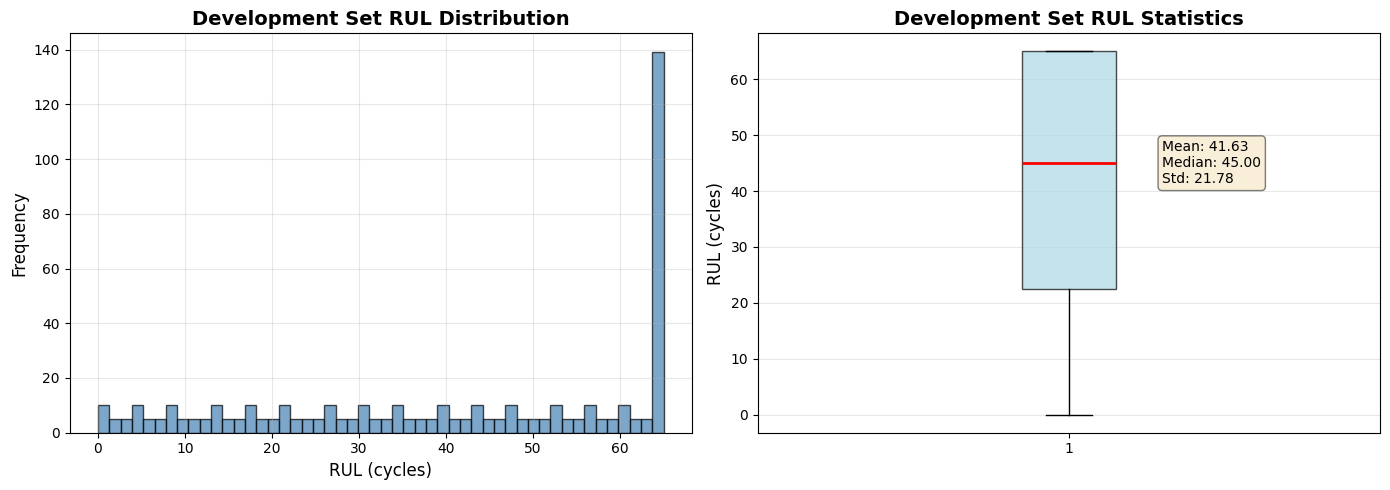


Development Set RUL Statistics:
  Total samples: 459
  Mean RUL: 41.63 cycles
  Median RUL: 45.00 cycles
  Std Dev: 21.78 cycles
  Min RUL: 0.00 cycles
  Max RUL: 65.00 cycles

[Step 3] Visualizing RUL Distribution for Test Set


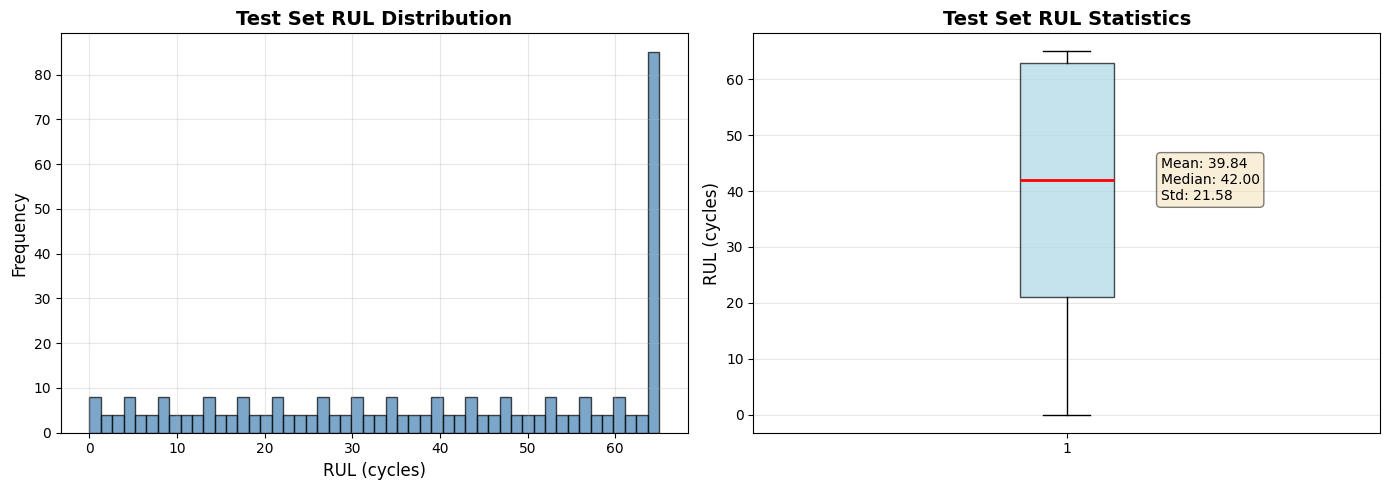


Test Set RUL Statistics:
  Total samples: 341
  Mean RUL: 39.84 cycles
  Median RUL: 42.00 cycles
  Std Dev: 21.58 cycles
  Min RUL: 0.00 cycles
  Max RUL: 65.00 cycles

[Step 4] Visualizing Sensor Time Series (Unit 0 from Dev Set)


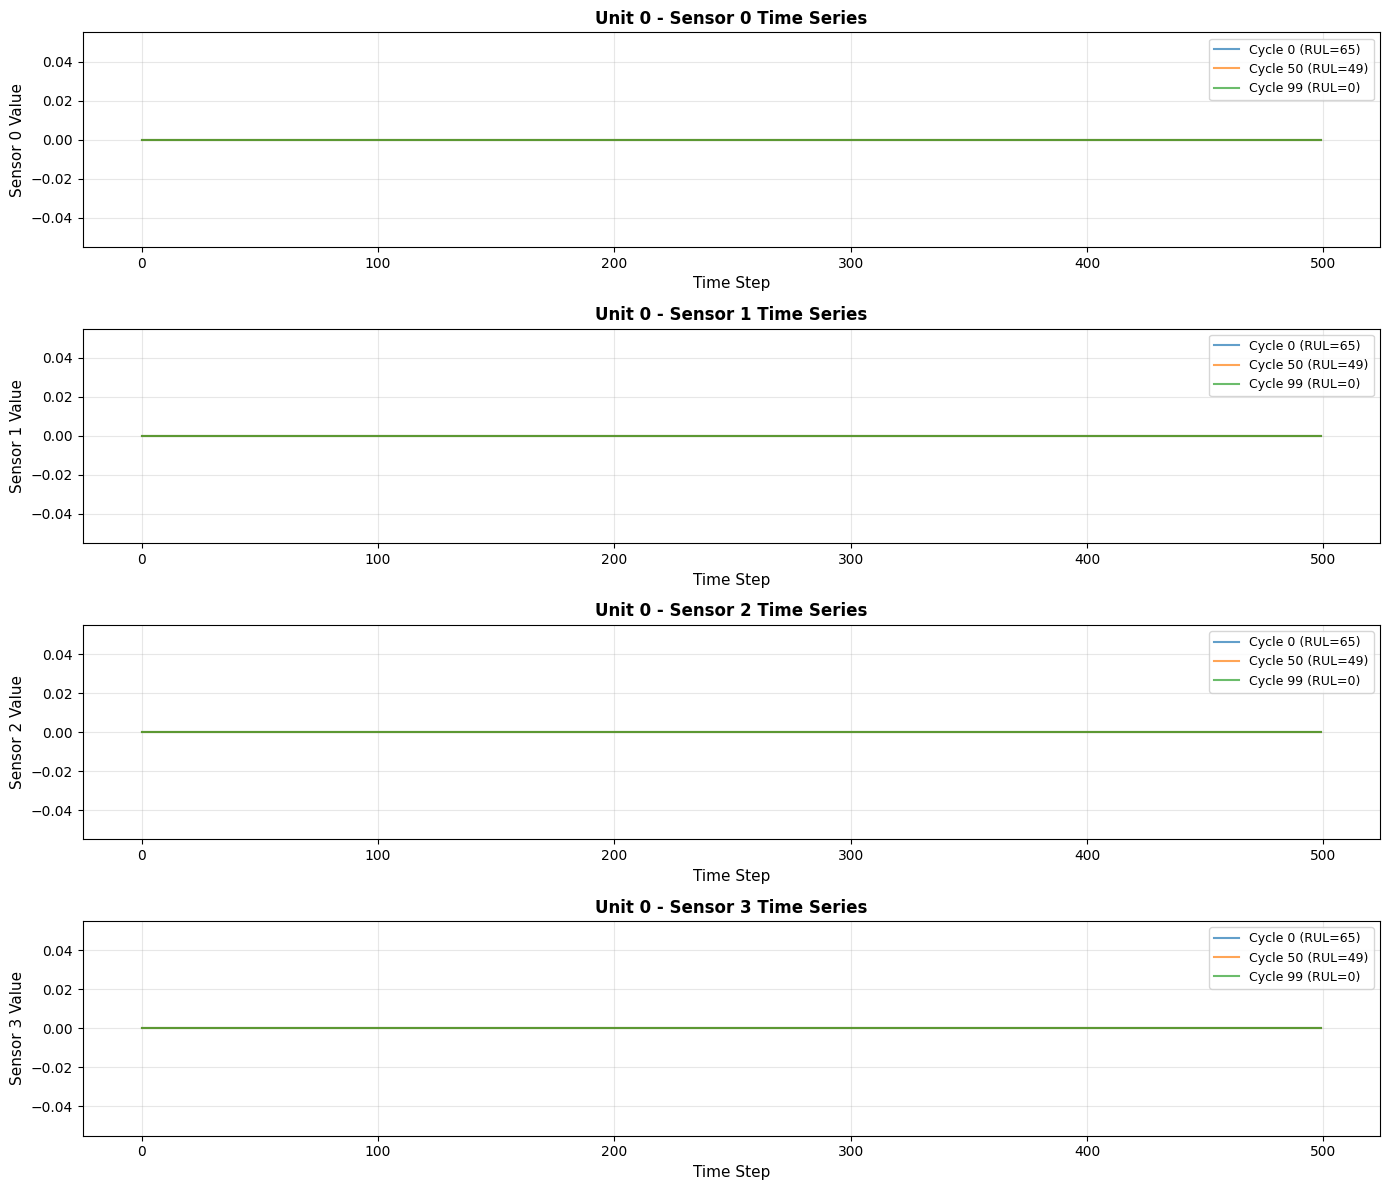


Unit 0 Information:
  Number of cycles: 100
  Timesteps per cycle: 20294
  Number of sensors: 32
  RUL range: 0 to 65 cycles

✅ All visualizations completed successfully!


In [ ]:
# Run visualization code directly
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Ensure /content is in sys.path
if '/content' not in sys.path:
    sys.path.insert(0, '/content')

os.chdir('/content')

# Define visualization functions inline
def plot_rul_distribution(labels, split_name="Dataset", max_bins=50):
    all_labels = np.concatenate([label for label in labels if len(label) > 0])
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes[0].hist(all_labels, bins=min(max_bins, len(np.unique(all_labels))), edgecolor='black', alpha=0.7, color='steelblue')
    axes[0].set_xlabel('RUL (cycles)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title(f'{split_name} RUL Distribution', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    axes[1].boxplot(all_labels, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue', alpha=0.7), medianprops=dict(color='red', linewidth=2))
    axes[1].set_ylabel('RUL (cycles)', fontsize=12)
    axes[1].set_title(f'{split_name} RUL Statistics', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3, axis='y')
    stats_text = f"Mean: {all_labels.mean():.2f}\nMedian: {np.median(all_labels):.2f}\nStd: {all_labels.std():.2f}"
    axes[1].text(1.15, np.median(all_labels), stats_text, fontsize=10, va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.tight_layout()
    plt.show()
    print(f"\n{split_name} RUL Statistics:")
    print(f"  Total samples: {len(all_labels)}")
    print(f"  Mean RUL: {all_labels.mean():.2f} cycles")
    print(f"  Median RUL: {np.median(all_labels):.2f} cycles")
    print(f"  Std Dev: {all_labels.std():.2f} cycles")
    print(f"  Min RUL: {all_labels.min():.2f} cycles")
    print(f"  Max RUL: {all_labels.max():.2f} cycles")

def plot_sensor_time_series(features, labels, unit_idx=0, sensor_indices=None, num_sensors=4, max_timesteps=500):
    if unit_idx >= len(features):
        print(f"Error: unit_idx {unit_idx} out of range. Only {len(features)} units available.")
        return
    unit_data = features[unit_idx]
    unit_labels = labels[unit_idx]
    if sensor_indices is None:
        sensor_indices = list(range(min(num_sensors, unit_data.shape[2])))
    num_sensors = len(sensor_indices)
    num_cycles = unit_data.shape[0]
    cycle_indices = [0, num_cycles // 2, num_cycles - 1] if num_cycles >= 3 else list(range(num_cycles))
    fig, axes = plt.subplots(num_sensors, 1, figsize=(14, 3 * num_sensors))
    if num_sensors == 1:
        axes = [axes]
    for i, sensor_idx in enumerate(sensor_indices):
        for cycle_idx in cycle_indices:
            cycle_data = unit_data[cycle_idx, :max_timesteps, sensor_idx]
            rul_value = unit_labels[cycle_idx]
            axes[i].plot(cycle_data, label=f'Cycle {cycle_idx} (RUL={rul_value:.0f})', alpha=0.7, linewidth=1.5)
        axes[i].set_xlabel('Time Step', fontsize=11)
        axes[i].set_ylabel(f'Sensor {sensor_idx} Value', fontsize=11)
        axes[i].set_title(f'Unit {unit_idx} - Sensor {sensor_idx} Time Series', fontsize=12, fontweight='bold')
        axes[i].legend(loc='best', fontsize=9)
        axes[i].grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    print(f"\nUnit {unit_idx} Information:")
    print(f"  Number of cycles: {num_cycles}")
    print(f"  Timesteps per cycle: {unit_data.shape[1]}")
    print(f"  Number of sensors: {unit_data.shape[2]}")
    print(f"  RUL range: {unit_labels.min():.0f} to {unit_labels.max():.0f} cycles")

# Load the data
from rul_datasets.reader.ncmapss import NCmapssReader

print("="*60)
print("N-CMAPSS RUL Prediction Data Pipeline")
print("="*60)

print("\n[Step 1] Loading N-CMAPSS FD001 dataset...")
reader = NCmapssReader(fd=1)
reader.prepare_data()
dev_X, dev_y = reader.load_split("dev")
val_X, val_y = reader.load_split("val")
test_X, test_y = reader.load_split("test")
print(f"✓ Data loaded successfully!")
print(f"  - Development set: {len(dev_X)} units")
print(f"  - Validation set: {len(val_X)} units")
print(f"  - Test set: {len(test_X)} units")

# Visualize Development Set
print("\n" + "="*60)
print("[Step 2] Visualizing RUL Distribution for Development Set")
print("="*60)
plot_rul_distribution(dev_y, split_name="Development Set")

# Visualize Test Set
print("\n" + "="*60)
print("[Step 3] Visualizing RUL Distribution for Test Set")
print("="*60)
plot_rul_distribution(test_y, split_name="Test Set")

# Visualize Sensor Time Series
print("\n" + "="*60)
print("[Step 4] Visualizing Sensor Time Series (Unit 0 from Dev Set)")
print("="*60)
plot_sensor_time_series(dev_X, dev_y, unit_idx=0, sensor_indices=[0, 1, 2, 3], max_timesteps=500)

print("\n" + "="*60)
print("✅ All visualizations completed successfully!")
print("="*60)

%%writefile src/utils/visualize.py
import numpy as np
import matplotlib.pyplot as plt

def plot_rul_distribution(labels, split_name="Dataset", max_bins=50):
    """
    Plot the distribution of Remaining Useful Life (RUL) values.
    
    Args:
        labels: List of numpy arrays containing RUL values for each unit
        split_name: Name of the dataset split (e.g., 'Train', 'Test')
        max_bins: Maximum number of bins for histogram
    """
    # Flatten all labels into a single array
    all_labels = np.concatenate([label for label in labels if len(label) > 0])
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(all_labels, bins=min(max_bins, len(np.unique(all_labels))),
                 edgecolor='black', alpha=0.7, color='steelblue')
    axes[0].set_xlabel('RUL (cycles)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title(f'{split_name} RUL Distribution', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Box plot
    axes[1].boxplot(all_labels, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_ylabel('RUL (cycles)', fontsize=12)
    axes[1].set_title(f'{split_name} RUL Statistics', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3, axis='y')
    
    # Add statistics text
    stats_text = f"Mean: {all_labels.mean():.2f}\nMedian: {np.median(all_labels):.2f}\nStd: {all_labels.std():.2f}"
    axes[1].text(1.15, np.median(all_labels), stats_text,
                 fontsize=10, va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{split_name} RUL Statistics:")
    print(f"  Total samples: {len(all_labels)}")
    print(f"  Mean RUL: {all_labels.mean():.2f} cycles")
    print(f"  Median RUL: {np.median(all_labels):.2f} cycles")
    print(f"  Std Dev: {all_labels.std():.2f} cycles")
    print(f"  Min RUL: {all_labels.min():.2f} cycles")
    print(f"  Max RUL: {all_labels.max():.2f} cycles")

def plot_sensor_time_series(features, labels, unit_idx=0, sensor_indices=None, num_sensors=4, max_timesteps=500):
    """
    Plot sensor time series for a specific unit.
    
    Args:
        features: List of numpy arrays with shape (num_cycles, timesteps, num_sensors)
        labels: List of numpy arrays containing RUL values
        unit_idx: Index of the unit to visualize
        sensor_indices: List of sensor indices to plot (if None, plots first num_sensors)
        num_sensors: Number of sensors to plot if sensor_indices is None
        max_timesteps: Maximum timesteps to display for clarity
    """
    if unit_idx >= len(features):
        print(f"Error: unit_idx {unit_idx} out of range. Only {len(features)} units available.")
        return
    
    unit_data = features[unit_idx]  # Shape: (num_cycles, timesteps, num_sensors)
    unit_labels = labels[unit_idx]   # Shape: (num_cycles,)
    
    if sensor_indices is None:
        sensor_indices = list(range(min(num_sensors, unit_data.shape[2])))
    
    num_sensors = len(sensor_indices)
    
    # Select a few representative cycles to plot
    num_cycles = unit_data.shape[0]
    cycle_indices = [0, num_cycles // 2, num_cycles - 1] if num_cycles >= 3 else list(range(num_cycles))
    
    fig, axes = plt.subplots(num_sensors, 1, figsize=(14, 3 * num_sensors))
    if num_sensors == 1:
        axes = [axes]
    
    for i, sensor_idx in enumerate(sensor_indices):
        for cycle_idx in cycle_indices:
            cycle_data = unit_data[cycle_idx, :max_timesteps, sensor_idx]
            rul_value = unit_labels[cycle_idx]
            axes[i].plot(cycle_data, label=f'Cycle {cycle_idx} (RUL={rul_value:.0f})', alpha=0.7, linewidth=1.5)
        
        axes[i].set_xlabel('Time Step', fontsize=11)
        axes[i].set_ylabel(f'Sensor {sensor_idx} Value', fontsize=11)
        axes[i].set_title(f'Unit {unit_idx} - Sensor {sensor_idx} Time Series', fontsize=12, fontweight='bold')
        axes[i].legend(loc='best', fontsize=9)
        axes[i].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nUnit {unit_idx} Information:")
    print(f"  Number of cycles: {num_cycles}")
    print(f"  Timesteps per cycle: {unit_data.shape[1]}")
    print(f"  Number of sensors: {unit_data.shape[2]}")
    print(f"  RUL range: {unit_labels.min():.0f} to {unit_labels.max():.0f} cycles")

if __name__ == "__main__":
    print("Visualization utilities for N-CMAPSS dataset")
    print("Functions available: plot_rul_distribution, plot_sensor_time_series")

# Clean Colab Cell Scaffold for N-CMAPSS Project

This notebook provides a clean scaffold for running a main.py script that references functions in a src/ folder structure. The cells below can be copied directly into your Colab notebook.

## Project Structure:
```
/content/
├── main.py           # Main entry point script
├── src/
│   ├── __init__.py
│   ├── data/
│   │   ├── __init__.py
│   │   └── load_data.py   # Data loading and splitting functions
│   ├── models/
│   │   ├── __init__.py
│   │   └── model.py       # Model definitions
│   └── utils/
│       ├── __init__.py
│       └── helpers.py     # Helper utilities
└── data/
    └── raw/              # Downloaded N-CMAPSS data
```

In [ ]:
# src/data/load_data.py
import os
import importlib
from typing import Tuple, Optional

def _ensure_rul_data_root(path: str) -> str:
    """
    Ensure the RUL datasets data root is set to 'path' (create folder if needed)
    and configure the rul_datasets library to use it.
    """
    path = os.path.abspath(path)
    os.makedirs(path, exist_ok=True)

    # Prefer the environment variable (the library reads it on import)
    os.environ["RUL_DATASETS_DATA_ROOT"] = path

    # Import rul_datasets (or reload it if already imported) and call set_data_root if available
    try:
        rul_datasets = importlib.import_module("rul_datasets")
        # If the module is already loaded and uses a different root, try to set it explicitly
        if hasattr(rul_datasets, "set_data_root"):
            try:
                rul_datasets.set_data_root(path)
            except Exception:
                # ignore if setting fails, env var should still be used
                pass
    except Exception as exc:
        raise ImportError(
            "rul-datasets is not installed or cannot be imported. "
            "Install with `pip install rul-datasets` and try again."
        ) from exc

    return path


def download_ncmapss(data_dir: str = "data/raw", fd: int = 1, cache: bool = True):
    """
    Prepare and cache the N-CMAPSS dataset for the requested fd subset.

    Args:
        data_dir: directory to cache data (will be used as RUL_DATASETS_DATA_ROOT)
        fd: dataset sub-index in [1..7] (N-CMAPSS uses fd indices)
        cache: whether to cache prepared arrays on disk (default True)

    Returns:
        reader: an instantiated NCmapssReader ready to use
    """
    data_root = _ensure_rul_data_root(data_dir)

    # import the reader class in a robust way
    try:
        from rul_datasets.reader.ncmapss import NCmapssReader
    except Exception as e:
        # try alternate import path if library layout differs
        try:
            from rul_datasets.reader import ncmapss as ncmapss_mod
            NCmapssReader = ncmapss_mod.NCmapssReader
        except Exception:
            raise ImportError(
                "Could not import NCmapssReader from rul_datasets. "
                "Make sure `rul-datasets` is installed and up to date (pip install rul-datasets)."
            ) from e

    # instantiate reader
    reader = NCmapssReader(fd=fd)

    # prepare data (this will download / convert / cache the files as needed)
    # prepare_data(cache=True) is the documented method to prepare and cache the data.
    # See docs: NCmapssReader.prepare_data(cache=True).
    reader.prepare_data(cache=cache)

    print(f"N-CMAPSS fd={fd} prepared and cached under: {data_root}")
    return reader


def get_datasets(fd: int = 1, data_dir: str = "data/raw", cache: bool = True) -> Tuple[Tuple, Optional[Tuple], Tuple]:
    """
    Returns (train/dev, val, test) as returned by the reader.load_split calls.
    Each is a tuple (features_list, labels_list) where features_list is a list
    of numpy arrays (one array per unit), same for labels_list.

    Args:
        fd: N-CMAPSS sub-dataset index (1..7)
        data_dir: folder used as cache / data root
        cache: whether to cache prepared arrays on disk

    Returns:
        (dev, val, test). If a validation split is not present, val will be None.
    """
    reader = download_ncmapss(data_dir=data_dir, fd=fd, cache=cache)

    # load the usual splits. The docs use "dev", "val", "test".
    # "dev" is the development/train-like split in this library.
    try:
        dev_features, dev_labels = reader.load_split("dev")
    except Exception as e:
        raise RuntimeError(f"Failed to load 'dev' split: {e}") from e

    val_pair = None
    try:
        val_features, val_labels = reader.load_split("val")
        val_pair = (val_features, val_labels)
    except Exception:
        # some versions or custom splits might not expose "val". That's okay.
        val_pair = None

    try:
        test_features, test_labels = reader.load_split("test")
    except Exception as e:
        raise RuntimeError(f"Failed to load 'test' split: {e}") from e

    return (dev_features, dev_labels), val_pair, (test_features, test_labels)


if __name__ == "__main__":
    # quick sanity run
    try:
        (dev_X, dev_y), val_pair, (test_X, test_y) = get_datasets(fd=1, data_dir="data/raw")
        print("dev units:", len(dev_X), "example shape:", dev_X[0].shape if dev_X else None)
        if val_pair is not None:
            print("val units:", len(val_pair[0]), "example shape:", val_pair[0][0].shape)
        else:
            print("no validation split found (val is None)")
        print("test units:", len(test_X), "example shape:", test_X[0].shape if test_X else None)
    except Exception as err:
        import traceback
        traceback.print_exc()
        raise

N-CMAPSS fd=1 prepared and cached under: /content/data/raw
dev units: 5 example shape: (100, 20294, 32)
val units: 1 example shape: (94, 20294, 32)
test units: 4 example shape: (90, 20294, 32)


## Cell 1: Install Dependencies and Setup Directory Structure

Run this cell first to install required packages and create the project folder structure.

In [ ]:
# Cell 1: Install dependencies and create directory structure

# Install required packages
!pip install -q rul-datasets torch scikit-learn numpy

# Create project directory structure
import os

# Create directories
dirs = [
    'src/data',
    'src/models',
    'src/utils',
    'data/raw'
]

for dir_path in dirs:
    os.makedirs(dir_path, exist_ok=True)
    print(f"✓ Created {dir_path}/")

# Create __init__.py files
init_files = [
    'src/__init__.py',
    'src/data/__init__.py',
    'src/models/__init__.py',
    'src/utils/__init__.py'
]

for init_file in init_files:
    with open(init_file, 'w') as f:
        f.write('')
    print(f"✓ Created {init_file}")

print("\n✅ Directory structure created successfully!")

In [ ]:
# ONE-CELL AUTOMATED N-CMAPSS SETUP, DOWNLOAD, SPLIT, VISUALIZE (for Colab)

# Install required packages
!pip install -q rul-datasets torch scikit-learn matplotlib numpy

import os
# Make project dirs and python modules
for d in ["src", "src/data", "src/utils", "data/raw"]:
    os.makedirs(d, exist_ok=True)
for f in ["src/__init__.py", "src/data/__init__.py", "src/utils/__init__.py"]:
    open(f, "w").close()

# Write data loading utility
with open("src/data/load_data.py", "w") as f:
    f.write('''import os, importlib

def _ensure_rul_data_root(path):
    path = os.path.abspath(path)
    os.makedirs(path, exist_ok=True)
    os.environ["RUL_DATASETS_DATA_ROOT"] = path
    try:
        rul_datasets = importlib.import_module("rul_datasets")
        if hasattr(rul_datasets, "set_data_root"):
            try:
                rul_datasets.set_data_root(path)
            except Exception:
                pass
    except Exception as exc:
        raise ImportError("rul-datasets is not installed. Please pip install rul-datasets.")
    return path

def download_ncmapss(data_dir="data/raw", fd=1, cache=True):
    _ensure_rul_data_root(data_dir)
    from rul_datasets.reader.ncmapss import NCmapssReader
    reader = NCmapssReader(fd=fd)
    reader.prepare_data(cache=cache)
    return reader

def get_datasets(fd=1, data_dir="data/raw", cache=True):
    reader = download_ncmapss(data_dir=data_dir, fd=fd, cache=cache)
    dev_X, dev_y = reader.load_split("dev")
    try:
        val_X, val_y = reader.load_split("val")
        val_pair = (val_X, val_y)
    except Exception:
        val_pair = None
    test_X, test_y = reader.load_split("test")
    return (dev_X, dev_y), val_pair, (test_X, test_y)
''')

# Write visualization utility
with open("src/utils/visualize.py", "w") as f:
    f.write('''import numpy as np
import matplotlib.pyplot as plt

def plot_rul_distribution(labels, split_name="Set"):
    arr = np.concatenate(labels)
    plt.hist(arr, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"{split_name} - RUL Distribution")
    plt.xlabel('RUL')
    plt.ylabel('Frequency')
    plt.show()

def plot_sensor_time_series(features, unit=0, sensor=0, timesteps=300):
    data = features[unit][:timesteps, sensor]
    plt.plot(data)
    plt.title(f"Unit {unit} - Sensor {sensor}")
    plt.xlabel('Time Step')
    plt.ylabel('Sensor Value')
    plt.show()
''')

# Write main script utility
with open("main.py", "w") as f:
    f.write('''from src.data.load_data import get_datasets
from src.utils.visualize import plot_rul_distribution, plot_sensor_time_series

if __name__ == "__main__":
    print("Downloading/loading dataset...")
    (dev_X, dev_y), _, (test_X, test_y) = get_datasets()
    print("Plotting RUL distributions:")
    plot_rul_distribution(dev_y, split_name="Train")
    plot_rul_distribution(test_y, split_name="Test")
    print("Plotting sensor time series for Unit 0, Sensor 0:")
    plot_sensor_time_series(dev_X, unit=0, sensor=0, timesteps=300)
''')

# Actually run everything!
!python main.py


Downloading/loading dataset...
Download N-C-MAPSS dataset from Google Drive
 17% 2.57G/14.8G [01:00<03:23, 64.4MB/s]Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/rul_datasets/reader/ncmapss.py", line 412, in _download_ncmapss
    utils.download_gdrive_file(NCMAPSS_DRIVE_ID, download_path)
  File "/usr/local/lib/python3.12/dist-packages/rul_datasets/utils.py", line 153, in download_gdrive_file
    _write_content(response, save_path)
  File "/usr/local/lib/python3.12/dist-packages/rul_datasets/utils.py", line 161, in _write_content
    for chunk in response.iter_content(chunk_size=32768):
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/models.py", line 820, in generate
    yield from self.raw.stream(chunk_size, decode_content=True)
  File "/usr/local/lib/python3.12/dist-packages/urllib3/response.py", line 1091, in stream
    data = self.read(amt=amt, decode_content=decode_content)
     